In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import cv2 as cv
from keras.layers import Conv2D,Dropout,MaxPooling2D,Flatten,Dense,BatchNormalization,Flatten
import numpy as np
import keras
from keras.applications.xception import Xception
from keras.applications.xception import preprocess_input
import matplotlib.pyplot as plt

In [2]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
val_datagen=ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [41]:
s=75

In [42]:
training_set = train_datagen.flow_from_directory('Face Mask Dataset/Train',
                                                 target_size = (s, s),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
training_set.class_indices

Found 10136 images belonging to 2 classes.


{'WithMask': 0, 'WithoutMask': 1}

In [43]:
test_set = test_datagen.flow_from_directory('Face Mask Dataset/Test',
                                            target_size = (s, s),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 992 images belonging to 2 classes.


In [44]:
val_set=val_datagen.flow_from_directory('Face Mask Dataset/Validation',
                                            target_size = (s, s),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 800 images belonging to 2 classes.


In [45]:
xception = Xception(weights='imagenet',include_top=False,input_shape=(s,s,3))
xception.trainable = False
model = Sequential()
model.add(xception)
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 3, 3, 2048)        20861480  
_________________________________________________________________
flatten_3 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                589856    
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 21,451,369
Trainable params: 589,889
Non-trainable params: 20,861,480
_________________________________________________________________


In [ ]:
# model = Sequential()
# model.add(Conv2D(32,3, activation='relu', input_shape=(s,s,3)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(BatchNormalization())
# model.add(Conv2D(32, (2, 2), activation='relu'))
# model.add(MaxPooling2D(pool_size=(3, 3)))
# model.add(BatchNormalization())
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))
# model.add(Flatten())
# model.add(Dense(512, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.4))
# model.add(Dense(1, activation='sigmoid')) 
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# model.summary()

In [ ]:
model.fit(training_set,
          steps_per_epoch = len(training_set)//4,
          epochs = 10,
          validation_data = test_set,
          validation_steps=len(test_set))

Epoch 1/10
79/79 [==============================] - 132s 2s/step - loss: 0.1776 - accuracy: 0.9556 - val_loss: 0.0466 - val_accuracy: 0.9889
Epoch 2/10
44/79 [===============>..............] - ETA: 39s - loss: 0.1098 - accuracy: 0.9680

In [ ]:
model.save('MaskXception75.h5')

In [15]:
model.evaluate(test_set)

124/124 [==============================] - 96s 778ms/step - loss: 0.0098 - accuracy: 0.9970


[0.009796243160963058, 0.9969757795333862]

In [28]:
def mask_label(pred):
    if(pred>0.5):
        return 'NO MASK'
    else:
        return 'MASK'

MASK


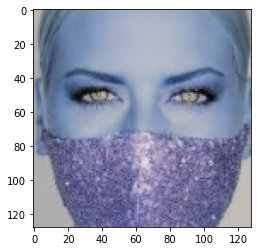

In [38]:
img =cv.imread('./Face Mask Dataset/Test/WithMask/45.png')
img = cv.resize(img,(s,s))
plt.imshow(img)
image = np.reshape(img,[1,s,s,3])
image = image/255.0
predict=model.predict(image)
print(mask_label(predict))

NO MASK


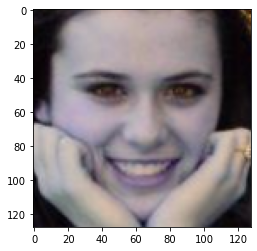

In [39]:
img =cv.imread('./Face Mask Dataset/Test/WithoutMask/4233.png')
img = cv.resize(img,(s,s))
plt.imshow(img)
image = np.reshape(img,[1,s,s,3])
image = image/255.0
predict=model.predict(image)
print(mask_label(predict))

In [31]:
#get x , y label from test 
x, y = test_set.next()

In [ ]:
# namedWindow('image', WINDOW_AUTOSIZE)
# imshow('image',img)
# waitKey(0)
# destroyAllWindows()